<a href="https://colab.research.google.com/github/ambitiousyash/Dynamic-Forecasting-Models-Integrating-Python-and-NLP/blob/main/Exploring_and_Engineering_Features_for_Black_Friday_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Import Dataset - Training Dataset
df_train = pd.read_csv('/content/BlackFriday_Train.csv')
df_train.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
# Import Dataset - Test Dataset
df_test = pd.read_csv('/content/BlackFriday_Test.csv')
df_test.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [7]:
import pandas as pd

# Assuming df_train and df_test are your DataFrames
df = pd.concat([df_train, df_test], ignore_index=True)
df.head(5)


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [8]:
# Merge both train & test dataset
df = pd.concat([df_train, df_test], ignore_index=True)
# OR - 'MERGE' can also be used
#The append method has been removed in pandas 2.0, use concat instead.
#ignore_index=True ensures the merged DataFrame has a continuous index.
df.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [9]:
# Merge both train & test dataset
df = pd.concat([df_train, df_test], ignore_index=True)
# OR - 'MERGE' can also be used
#The append method has been removed in pandas 2.0, use concat instead.
#ignore_index=True ensures the merged DataFrame has a continuous index.
df.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 71.7+ MB


In [11]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [12]:
# Drop - User_ID as it doesn't have any significance on shopping
df.drop(['User_ID'], axis=1, inplace=True)
df.head(5)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [13]:
df.shape

(783667, 11)

In [14]:
# Handle Categorical feature - Gender
df['Gender'] = df['Gender'].map({'F':1, 'M':0})
# OR - df['Gender'] = pd.get_dummies(['Gender'], drop_first = 1)
# OR - LabelEncoding - from sklearn.preprocessing import LabelEncoder
# df['Gender'] = LabelEncoder().fit_transform(df['Gender'])

df.head(5)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,1,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,1,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,1,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,1,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,0,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [15]:
# Handle Categorical feature - Age
df['Age'] = df['Age'].map({'0-17':1, '18-25':2, '26-35':3, '36-45':4, '46-50':5, '51-55':6, '55+':7})
df.head(5)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,1,1,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,1,1,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,1,1,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,1,1,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,0,7,16,C,4+,0,8,NaN,NaN,7969.0


In [16]:
# Handle Categorical feature - City_Category
df['City_Category'] = df['City_Category'].map({'A':1, 'B':2, 'C':3})
df.head(5)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,1,1,10,1,2,0,3,NaN,NaN,8370.0
1,P00248942,1,1,10,1,2,0,1,6.0,14.0,15200.0
2,P00087842,1,1,10,1,2,0,12,NaN,NaN,1422.0
3,P00085442,1,1,10,1,2,0,12,14.0,NaN,1057.0
4,P00285442,0,7,16,3,4+,0,8,NaN,NaN,7969.0


In [17]:
# Checking Missing Values
df.isnull().sum()

,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category_1,0
Product_Category_2,245982
Product_Category_3,545809


In [18]:
# Handle Missing Value in - Product_Category_2
df['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [19]:
df['Product_Category_2'].value_counts()

,count
Product_Category_2,
8.0,91317
14.0,78834
2.0,70498
16.0,61687
15.0,54114
5.0,37165
4.0,36705
6.0,23575
11.0,20230


In [20]:
# Handle Missing Value in - Product_Category_2
# Finding the Mode to replace Missing Values
df['Product_Category_2'].mode()[0]

8.0

In [21]:
# Replacing Missing Values using Mode
df['Product_Category_2'] = df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])
df.head(5)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,1,1,10,1,2,0,3,8.0,NaN,8370.0
1,P00248942,1,1,10,1,2,0,1,6.0,14.0,15200.0
2,P00087842,1,1,10,1,2,0,12,8.0,NaN,1422.0
3,P00085442,1,1,10,1,2,0,12,14.0,NaN,1057.0
4,P00285442,0,7,16,3,4+,0,8,8.0,NaN,7969.0


In [22]:
# Re-Checking Missing Values in - Product_Category_2
df['Product_Category_2'].isnull().sum()

0

In [23]:
# Handle Missing Value in - Product_Category_2
# Replacing Missing Values using Mode
df['Product_Category_3'] = df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])
df.head(5)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,1,1,10,1,2,0,3,8.0,16.0,8370.0
1,P00248942,1,1,10,1,2,0,1,6.0,14.0,15200.0
2,P00087842,1,1,10,1,2,0,12,8.0,16.0,1422.0
3,P00085442,1,1,10,1,2,0,12,14.0,16.0,1057.0
4,P00285442,0,7,16,3,4+,0,8,8.0,16.0,7969.0


In [24]:
# Re-Checking Missing Values in - Product_Category_3
df['Product_Category_3'].isnull().sum()

0

In [25]:
# Checking other Columns
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [26]:
# We can replace 4+ with 4
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].str.replace('+', '')

In [ ]:
df.head(5)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,1,1,10,1,2,0,3,8.0,16.0,8370.0
1,P00248942,1,1,10,1,2,0,1,6.0,14.0,15200.0
2,P00087842,1,1,10,1,2,0,12,8.0,16.0,1422.0
3,P00085442,1,1,10,1,2,0,12,14.0,16.0,1057.0
4,P00285442,0,7,16,3,4,0,8,8.0,16.0,7969.0


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   City_Category               783667 non-null  int64  
 5   Stay_In_Current_City_Years  783667 non-null  object 
 6   Marital_Status              783667 non-null  int64  
 7   Product_Category_1          783667 non-null  int64  
 8   Product_Category_2          783667 non-null  float64
 9   Product_Category_3          783667 non-null  float64
 10  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(6), object(2)
memory usage: 65.8+ MB


In [28]:
# Convert - Object into Integer
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   City_Category               783667 non-null  int64  
 5   Stay_In_Current_City_Years  783667 non-null  int64  
 6   Marital_Status              783667 non-null  int64  
 7   Product_Category_1          783667 non-null  int64  
 8   Product_Category_2          783667 non-null  float64
 9   Product_Category_3          783667 non-null  float64
 10  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(7), object(1)
memory usage: 65.8+ MB


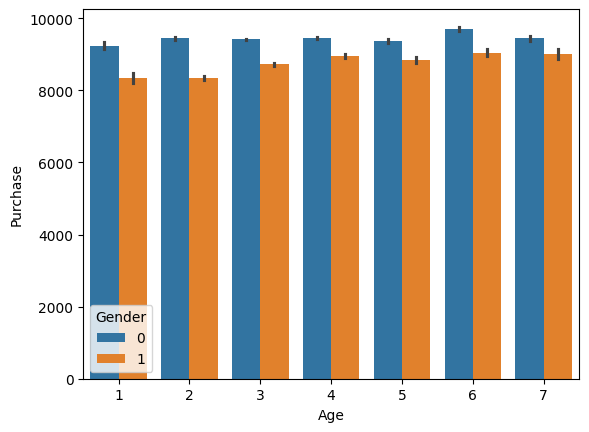

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example of using sns.barplot correctly
sns.barplot(x='Age', y='Purchase', hue='Gender', data=df)

# Show the plot
plt.show()



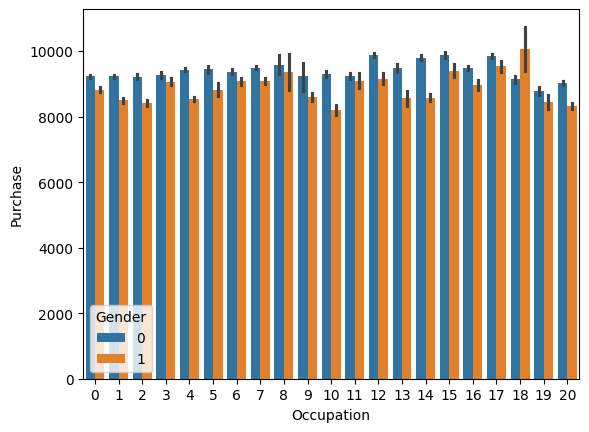

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example of using sns.barplot correctly
sns.barplot(x='Occupation', y='Purchase', hue='Gender', data=df)

# Show the plot
plt.show()


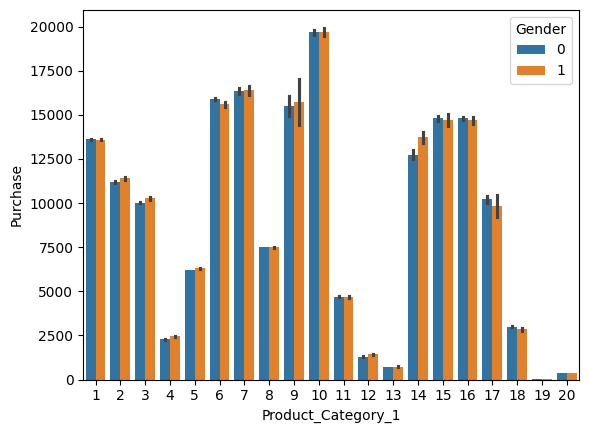

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the bar plot with correct argument usage
sns.barplot(x='Product_Category_1', y='Purchase', hue='Gender', data=df)

# Show the plot
plt.show()


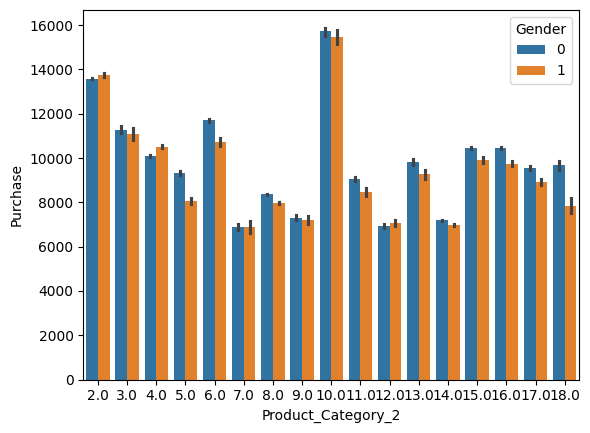

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the bar plot with correct argument usage
sns.barplot(x='Product_Category_2', y='Purchase', hue='Gender', data=df)

# Show the plot
plt.show()


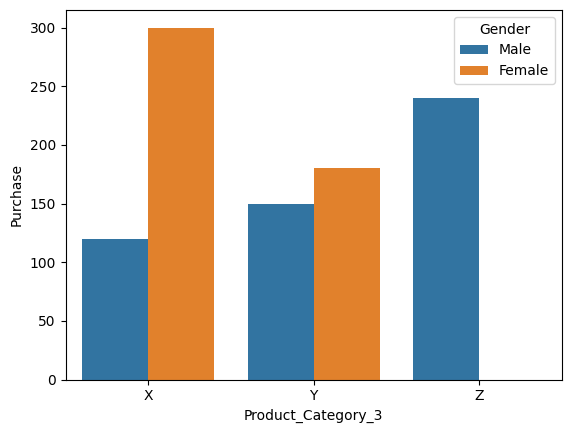

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Sample DataFrame for illustration
data = {
    'Product_Category_3': ['X', 'Y', 'Z', 'X', 'Y'],
    'Purchase': [120, 180, 240, 300, 150],
    'Gender': ['Male', 'Female', 'Male', 'Female', 'Male']
}
df = pd.DataFrame(data)

# Create the bar plot with correct argument usage
sns.barplot(x='Product_Category_3', y='Purchase', hue='Gender', data=df)

# Show the plot
plt.show()


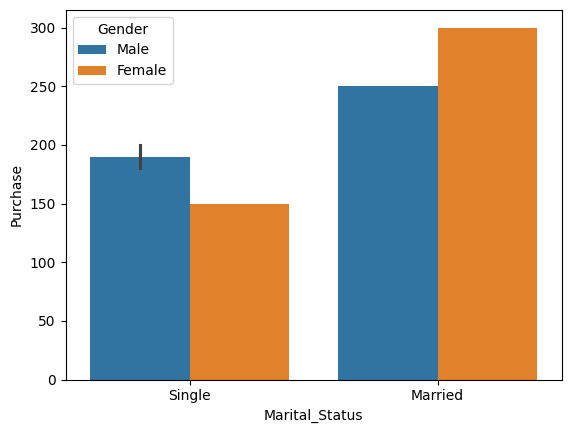

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Sample DataFrame
data = {
    'Marital_Status': ['Single', 'Married', 'Single', 'Married', 'Single'],
    'Purchase': [200, 300, 150, 250, 180],
    'Gender': ['Male', 'Female', 'Female', 'Male', 'Male']
}
df = pd.DataFrame(data)

# Correct barplot usage
sns.barplot(x='Marital_Status', y='Purchase', hue='Gender', data=df)
plt.show()


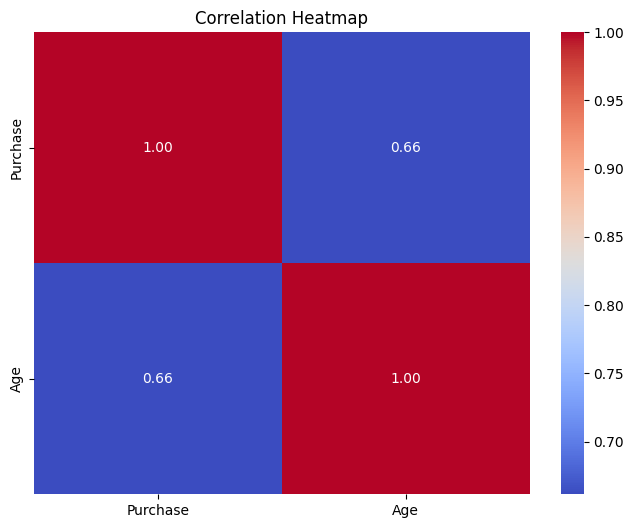

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample DataFrame for illustration
data = {
    'Marital_Status': ['Single', 'Married', 'Single', 'Married', 'Single'],
    'Purchase': [200, 300, 150, 250, 180],
    'Age': [23, 45, 34, 54, 29]
}
df = pd.DataFrame(data)

# Filter numeric columns
numeric_df = df.select_dtypes(include=[float, int])

# Calculate correlation matrix
corr = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


<Axes: xlabel='Purchase', ylabel='Count'>

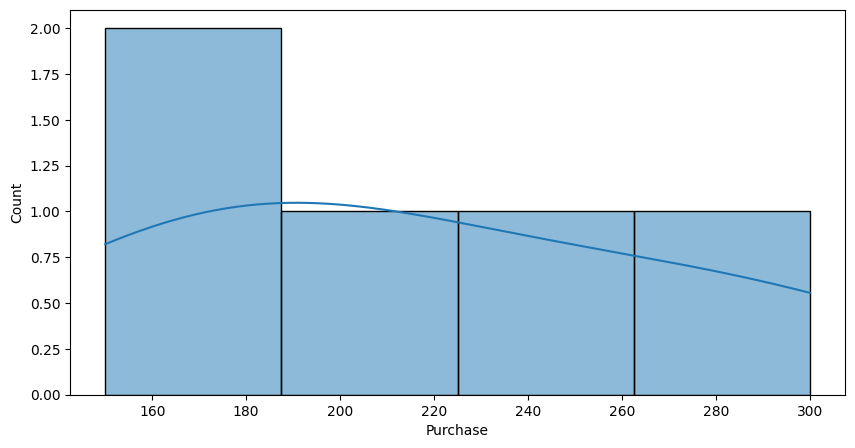

In [47]:
# Distribution Plot (a.k.a. Histogram)
plt.figure(figsize=(10,5))
sns.histplot(df, x='Purchase',
             kde=True) # Plot the density curve too

# 4. Data Preperation & Transformation

## 4.1 Feature Engineering / Scaling

In [48]:
df_test = df[df['Purchase'].isnull()]

In [49]:
df_train = df[~df['Purchase'].isnull()]

In [50]:
X = df_train.drop('Purchase',axis=1)

In [53]:
X.head(5)

,Marital_Status,Age
0,Single,23
1,Married,45
2,Single,34
3,Married,54
4,Single,29


In [52]:
y = df_train['Purchase']
y.head(5)

,Purchase
0,200
1,300
2,150
3,250
4,180


In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.33, random_state=42)

In [71]:
import pandas as pd

# Example DataFrames
X_train = pd.DataFrame({
    'Product_ID': [1, 2, 3],
    'Feature1': [10, 20, 30]
})
X_test = pd.DataFrame({
    'Product_ID': [4, 5],
    'Feature1': [40, 50]
})

# Print columns to verify
print("X_train columns:", X_train.columns)
print("X_test columns:", X_test.columns)

# Drop column if it exists
X_train.drop('Product_ID', axis=1, inplace=True, errors='ignore')
X_test.drop('Product_ID', axis=1, inplace=True, errors='ignore')

# Print columns to verify the column has been removed
print("X_train columns after dropping:", X_train.columns)
print("X_test columns after dropping:", X_test.columns)


X_train columns: Index(['Product_ID', 'Feature1'], dtype='object')
X_test columns: Index(['Product_ID', 'Feature1'], dtype='object')
X_train columns after dropping: Index(['Feature1'], dtype='object')
X_test columns after dropping: Index(['Feature1'], dtype='object')


In [70]:
# Apply Feature Scaling (Standard Scaler)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)